# Lambda School Data Science Module 133

## Introduction to Bayesian Inference




## Assignment - Code it up!

Most of the above was pure math - now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up, and as a stretch goal - refactor your code into helpful reusable functions!

Specific goals/targets:

1. Write a function `def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk)` that reproduces the example from lecture, and use it to calculate and visualize a range of situations
2. Explore `scipy.stats.bayes_mvs` - read its documentation, and experiment with it on data you've tested in other ways earlier this week
3. Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach
4. In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/) - you could and should create something similar!

Stretch goals:

- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/95c6524a3736c43e4bae139713f3df2392e6eda9)


In [0]:
import numpy as np

In [0]:
def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk):
  num = (prob_positive*prob_drunk_prior)
  denom = (num + (1 - prob_positive)*(1 - prob_drunk_prior))
  prior = num/denom
  print(prior)

In [0]:
def bayes_theorem (prob_drunk_prior, prob_positive, prob_positive_drunk, num_iter):
  posterior_list = []
  num = (prob_positive*prob_drunk_prior)
  denom = (num + (1 - prob_positive)*(1 - prob_drunk_prior))
  prior = num/denom
  posterior_list.append(prior)
  for i in range(1, num_iter):
    new_num = (prob_positive*posterior_list[i-1])
    new_denom = (new_num + (1 - prob_positive)*(1 - posterior_list[i-1]))
    posterior = new_num/new_denom 
    posterior_list.append(posterior)
  return(posterior_list)

In [4]:
prob_drunk_given_positive(.005, .99, .99)

0.33221476510067094


In [5]:
prob_drunk_given_positive(0.3322, .99, .99)

0.980098701856024


In [6]:
bayes_theorem(.005, .99, .99, 2)
#1.. 2.. testing...

[0.33221476510067094, 0.9800999999999999]

In [0]:
bayes_theorem_data = bayes_theorem(.005, .99, .99, 9)

In [8]:
bayes_theorem_data

[0.33221476510067094,
 0.9800999999999999,
 0.9997949506335922,
 0.9999979283737839,
 0.9999999790744397,
 0.9999999997886307,
 0.999999999997865,
 0.9999999999999785,
 0.9999999999999998]

In [0]:
#while this starts to resemble common sense. However, I'm not convinced this is right. If it is - here is what it would mean:
#the probability of the tested subject to be >>truly<< under the influence is almost a certainty if 3 consecutive tests would show positive.

In [10]:
len(bayes_theorem_data)

9

In [0]:
import matplotlib.pyplot as plt

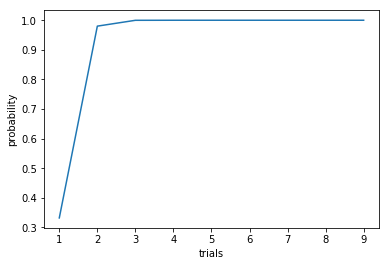

In [12]:
plt.plot(bayes_theorem_data)
plt.xlabel('trials')
plt.ylabel('probability')
plt.xticks((0, 1, 2, 3, 4, 5, 6, 7, 8), [1, 2, 3, 4, 5, 6, 7, 8, 9]);

In [0]:
from scipy import stats

In [14]:
help(stats.bayes_mvs)

Help on function bayes_mvs in module scipy.stats.morestats:

bayes_mvs(data, alpha=0.9)
    Bayesian confidence intervals for the mean, var, and std.
    
    Parameters
    ----------
    data : array_like
        Input data, if multi-dimensional it is flattened to 1-D by `bayes_mvs`.
        Requires 2 or more data points.
    alpha : float, optional
        Probability that the returned confidence interval contains
        the true parameter.
    
    Returns
    -------
    mean_cntr, var_cntr, std_cntr : tuple
        The three results are for the mean, variance and standard deviation,
        respectively.  Each result is a tuple of the form::
    
            (center, (lower, upper))
    
        with `center` the mean of the conditional pdf of the value given the
        data, and `(lower, upper)` a confidence interval, centered on the
        median, containing the estimate to a probability ``alpha``.
    
    See Also
    --------
    mvsdist
    
    Notes
    -----
    Each

In [0]:
import pandas as pd

In [0]:
columns = ["political_view",
           "handicapped_infants",
           "water_project_cost_sharing",
           "adoption_of_the_budget_resolution",
           "physician_fee_freeze",
           "el_salvador_aid",
           "religious_groups_in_schools",
           "anti_satellite_test_ban",
           "aid_to_nicaraguan_contras",
           "mx_missile",
           "immigration",
           "synfuels_corporation_cutback",
           "education_spending",
           "superfund_right_to_sue",
           "crime",
           "duty_free_exports",
           "export_administration_act_south_africa"]

In [17]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data", na_values = "?", names = columns)
df.head()

,political_view,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [0]:
df = df.replace(to_replace=['n', 'y'], value=[0, 1])
df = df.fillna(0.5)

df_rep = df[df["political_view"] == "republican"]
df_rep = df_rep.drop("political_view", axis=1)

df_dem = df[df["political_view"] == "democrat"]
df_dem = df_dem.drop("political_view", axis = 1)

In [0]:
from scipy import stats 

def confidence_interval(data, confidence=0.95):
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = stats.sem(data)
  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
  interval = stderr * t
  return (mean - interval, mean, mean + interval)

In [0]:
mean, var, std = stats.bayes_mvs(df_rep['crime'])

In [21]:
print(mean.statistic, mean.minmax)

0.9613095238095238 (0.9403652785915517, 0.982253769027496)


In [0]:
def compare(name, alpha):
  mean, var, std = stats.bayes_mvs(df_rep[name])
  FC = (confidence_interval(df_rep[name], alpha)), 
  BT = (mean.statistic, mean.minmax)
  return (FC, BT)

In [23]:
compare("adoption_of_the_budget_resolution", 0.95)

(((0.09071304670955654, 0.14285714285714285, 0.19500123900472915),),
 (0.14285714285714285, (0.09917121738605213, 0.18654306832823356)))

In [24]:
compare("physician_fee_freeze", 0.95)

(((0.9598814365442059, 0.9791666666666666, 0.9984518967891274),),
 (0.9791666666666666, (0.9630096481724137, 0.9953236851609195)))

In [0]:
comp_data_FP = {'data': ["adoption_of_the_budget_resolution", "physician_fee_freeze"],
             'FP_min': [0.09071304670955654, 0.9598814365442059],
             'FP_mean': [0.14285714285714285, 0.9791666666666666],
             'FP_max': [0.19500123900472915, 0.9984518967891274]}

In [0]:
comp_data_BT = {'data': ["adoption_of_the_budget_resolution", "physician_fee_freeze"],
             'BT_min': [0.09917121738605213, 0.9630096481724137], 
             'BT_mean': [0.14285714285714285, 0.9791666666666666],
             'BT_max': [0.18654306832823356, 0.9953236851609195]}

In [0]:
comp_data_BT = pd.DataFrame(comp_data_BT)
comp_data_FP = pd.DataFrame(comp_data_FP)

In [34]:
comp_data_BT.set_index("data")

,BT_min,BT_mean,BT_max
data,,,
adoption_of_the_budget_resolution,0.099171,0.142857,0.186543
physician_fee_freeze,0.963010,0.979167,0.995324


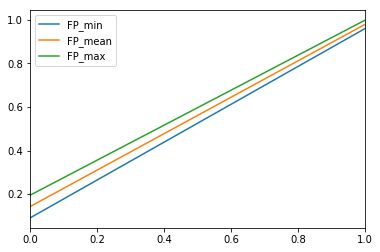

In [48]:
comp_data_FP.plot();

In [0]:
# the means are the same, but the min and max are different when testing the same datasets. Bayes seems to produce "narrower" brackets.

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)